<a href="https://colab.research.google.com/github/beatriz0freitas/PL/blob/main/PL_NB02_Regular_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NB02: Regular Languages

## Language Processing

## LEI/2025-26

#### Nuno Macedo
Universidade do Minho



# 2.1 Regular Languages

- Regular languages is the simplest class of languages in Chomsky hierarchy

- They cannot express dependencies like "the same number of symbols" or properly nested structures

- Recognizable by **finite automata**

- Described formally by **regular expressions** (REs)

- Important for **lexical analysis**, input validation, and simple pattern recognition


## Example: A Language of Valid Identifiers

- The language of Python identifiers
  - ✅ `aux_function`, `_hiddenVar`, `xy23`
  - ❌ `23xy`, `ab+xy`, `-xyz`



In [ ]:
aux_function = True
_hiddenVar = True
xy23 = True
# 23xy = True
# ab+xy = True
# -xyz = True

- Pattern description:
  - *Arbitrary-length* sequences of *alphanumeric or underscore* symbols
  - *Cannot start* with a numeric symbol (why?)

- How can we **formally specify** these rules?

- How can we **efficiently recognize** such identifiers?

# 2.2 Regular Expressions
   
- **Regular expressions** (REs), also known as *regexes*, are human-friendly ways to describe regular languages

- Main uses:
  - Define lexing rules for compilers/interpreters
  - Detect patterns in text processing
  - Search and replace in editors or IDEs



## Regular expressions in theory

* A RE is built from:

  - **Base cases**:
    - Symbols $a \in \Sigma$
    - Empty set: $\emptyset$
    - Empty word: $\epsilon$

  - **Inductive cases** (for expressions $e_1$, $e_2$):
    - Concatenation: $e_1 e_2$
    - Union / alternation: $e_1 | e_2$
    - Kleene closure: $e_1^*$ (zero or more repetitions)

## Example: A Language of Valid Identifiers (basic RE)

- $(a|b|...|w|z|A|B|...|W|Z|\_)(a|b|...|w|z|A|B|...|W|Z|\_|0|1|...|9)^*$

  - $(a|b|...|w|z|A|B|...|W|Z|\_)$ any alphabetic symbol or an underscore

  - $(a|b|...|w|z|A|B|...|W|Z|\_|0|1|...|9)$ any alpha-numeric symbol or an underscore

  - $(a|b|...|w|z|A|B|...|W|Z|\_|0|1|...|9)^*$ any alpha-numeric symbol or an underscore, repeated an arbitrary number of times

  - $(a|b|...|w|z|A|B|...|W|Z|\_)(a|b|...|w|z|A|B|...|W|Z|\_|0|1|...|9)^*$ any alpha-numeric symbol or an underscore, followed by an arbitrary number of alpha-numeric symbols or underscores



## Concrete syntax for regular expressions

- Theory of computation deals with the formal notion of REs

- RE processors in introduce other operators to facilitate the writing of REs
  - In most cases, syntactic sugar that does not increase theoretical expressivity

- Syntax may vary slightly depending on the RE processor
  - A popular syntax is the one inspired by Perl, which is followed by Python

- Special symbols
  - `.` matches any symbol except a new line
  - `^` matches the start of the string
  - `$` matches the end of the string

- Repetition
  - `*` matches any repetition of the preceeding RE
  - `+` matches one or more repetitions of the preceeding RE
  - `?` matches 0 or 1 repetitions of the preceeding RE
  - `{n}` matches exactly `n` repetitions of the preceeding RE
  - `{m,n}` matches between `n` and `m` repetitions of the preceeding RE

- `|` union (alternative) of two REs

- `[...]` creates a group of alternative symbols
  - `-` can be used for ranges of symbols (to match `-`, put it in the begining or end of group)
  - `^` denotes the complement, all symbols except those declared
  - All symbols treated as literal inside group except `-`, `]` and `^`
  
- Symbol groups
  - `\d` for any digit symbol
  - `\s` for any whitespace symbol
  - `\w` any alpha-numberic symbol plus the underscore `_`
  - `\b` matches the boundary of words without consuming any symbol
  - Upper-case versions for complement set (e.g., `\D` for any symbol that is **not** a digit)

- Operator precedence is (roughly):
  - Repetition operators → Concatenation → Alternative
  - Parenthesis `(` `)` to group REs and change operator precedence

- From now on, we will use this concrete syntax, not the formal RE notation

## Example: A Language of Valid Identifiers (extended RE)

- `[a-zA-Z_][a-zA-Z0-9_]*`

  - `a-z` all symbols between `a` and `z`

  - `A-Z` all symbols between `A` and `Z`

  - `0-9` all symbols between `0` and `9`

  - `[a-zA-Z_]` any symbol between `a` and `z`, `A` and `Z` or underscore `_`

  - `[a-zA-Z0-9_]` any symbol between `a` and `z`, `A` and `Z`, `0` and `9` or underscore `_`

  - `[a-zA-Z0-9_]*` any repetitions of symbols between `a` and `z`, `A` and `Z`, `0` and `9` or underscore `_`

- Or simply `[a-zA-Z_]\w*`


## Example: A Language for Floating Point Numbers

In [ ]:
print(10.34)
print(.34)
print(10.)
# print(.)
print(-.34)
print(+10.)
print(10.34E-3)
print(.34e3)

10.34
0.34
10.0
-0.34
10.0
0.01034
340.0


- Unsigned integer numbers:

    `\d+` → `23`

- Unsigned floating point numbers:

    `\d+\.\d+`  → `23.45`

- Unsigned integer or floating point numbers:

    `\d+(\.\d+)?` → `23` or `23.45`

- Unsigned integer or floating point numbers, possibly omitting one side of point but not both:

    `\d+(\.\d*)?|\.\d+` → `23` or `23.45` or `.45` or `23.`

- Possibly signed integer or floating point numbers, possibly omitting one side of point but not both:

     `[+-]?(\d+(\.\d*)?|\.\d+)` → `+23` or `-23.45` or `.45` or `+23.`

- Possibly signed floating point numbers, possibly omitting one side of point but not both, with optional, possibly signed, exponent:
    
    `[+-]?(\d+\.\d*|\d*\.\d+)([eE][+-]?\d+)?` → `+23` or `-23.45E+56` or `.45e-56` or `+23.e56`

## Beyond word recognition

- Although REs in theory are used to recognize words belonging to a language, in practice they are often used find substrings in a larger text

- In this case, the output is no longer yes/no, but a set of **matches**

- The language accepted by the RE does not change, but the set of returned matches may change depending on the RE processor

- This is the basis of the tokenization stage in the language processing pipeline

## Example: A Language of Valid Identifiers (matches)

- How many identifiers are there in the following code?

- That is, how many matches are there for `[a-ZA-Z_]\w*`?

  ```python
  for i in range(10): print(i)
  ```

- The RE will recognize `i`, `range`, `print`, `for` and `in`

- But also `r`, `ra`, `ran`, `rang` and `p`, `pr`, `pri`, `prin`!

📌 `for` and `in` are not actually identifiers, they are *keywords*; we will address this overlap later

## Greedy vs. Lazy matching

- Theoretical REs are only concerned about recognition
  - Whether a word belongs to the language or not

- But the same word may be matched by a RE in different ways
  - This is not irrelevant for the user when processing a text

- By default, repetition operators are *greedy*, the match as many symbols as possible

- *Lazy* variants are used when a `?` is appended (`*?`, `+?`, `{n,m}?`)

- This affects how the RE processor matches, but not the overall language

- *Example*: detecting text between quotes in input text `I say "Hello" and you say "World"`
  - Regex `".*"` is greedy, it has a single match, `"Hello" and you say "World"`
  -  Regex `".*?"` is lazy, it has two matches, both `"Hello"` and `"World"`

## Capturing groups

- Often we are only interested in part of the substring matched by an RE

- REs support the introduction of *capturing groups* using parenthesis `(...)`, that specify what is returned in a match

- *Example*: detecting text between quotes in input text `I say "Hello" and you say "World"`
  - with `".*?"`, matches will include the quotes, `"Hello"` and `"World"`
  - with capturing group `"(.*?)"`, matches will be only `Hello` and `World`

- Sometimes we need to use parenthesis to group expressions but do not want a capturing group
  - In that case we have to escape the delimiters with `(?:...)`

## Backreferences

- Modern REs also allow *backreferences* to captured groups with `\number`

- This is a powerful feature that goes beyond what theoretical REs allow

- *Example*: find all repeated alpha-numeric patterns
  - `(\w+)\1` matches words like `AA`, `ABAB` or `ABCABC`

- Also useful for text substitution that preserves part of the original match

## Exercise: Find title patterns in JSON file

Open file `cinema.json` in any text editor of your choice.

- Find all occurrences of:
  - All titles
  - All titles that include a number
  - All titles that include a **real** number
  - All titles that include **two** numbers
  - All titles where character `x` **does not** occur
  - All titles with **repeated** words
  - All **multi-line** titles

- Remove all subtitles (identified by `:`)

- Surround numbers in titles by single quotes `'`

## Regular expressions in Python

- Regular expressions processing in Python are provided by module `re` (see [documentation](https://docs.python.org/3/library/re.html))

- Very rich module with advanced features, based on the well-known Perl syntax

## Functions for detecting matches

- `re.match(regex, text)` tries to match `regex` from the beginning of `text`

- `re.fullmatch(regex, text)` tries to match `regex` from the beginning to the end `text`

- `re.search(regex, text)` tries to match `regex` anywhere in `text` (will return first occurrence)

- `re.finditer(regex, text)` returns an iterator over all (non-overlapping) matches of `regex` in `text`

- `re.findall(regex, text)` returns all (non-overlapping) substrings of `text` matched bt `regex`


- All these functions, except `findall()`, return `Match` objects with information about the matched substring

- For a `Match` `m`:
  - `m.group()` retrieves the matched substring
  - `m.span()` (or `m.start()` and `m.end()`) returns indexes matched by the substring in the full string



### Function for substitutions

- `re.sub(regex, repl, text)` replaces all matches of `regex` in `text` by `repl`

- `repl` can be:
  - a string that can refer to the `regex` capturing groups
  - a function that processes `Match` objects

### Raw strings and Python

- Regular expressions have their own special characters prefixed with `\`

- To avoid clashes with Python's special characters, you should write them as raw strings, prefixed with `r`

- `r"\w+"` vs. `"\\w+"`

# 2.3 Finite Automata

- REs provide a way to specify regular languages

- However, we need a mechanism to operationalize the recognition of words

- *Finite automata* (FA) are such a mechanism for regular languages

- An FA is essentially a state machine with transitions triggered by alphabet symbols
  - After processing the full input, the reached state determines acceptance

- FAs give an answer about language membership in *linear time* over the length of the input
  - Each symbol of the input is inspected once

📌 Throughout the notebook, the [`automata`](https://caleb531.github.io/automata/) Python module is used to draw and manipulate automata. This is not part of the syllabus.

In [ ]:
# libraries to allow the visualization and manipulation of automata
!apt-get update -qq
!apt-get install -y -qq graphviz graphviz-dev
!pip install -q pygraphviz coloraide
!pip install -q automata-lib

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libatk1.0-data.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../00-libatk1.0-data_2.36.0-3build1_all.deb ...
Unpacking libatk1.0-data (2.36.0-3build1) ...
Selecting previously unselected package libatk1.0-0:amd64.
Preparing to unpack .../01-libatk1.0-0_2.36.0-3build1_amd64.deb ...
Unpacking libatk1.0-0:amd64 (2.36.0-3build1) ...
Selecting previously unselected package libgtk2.0-common.
Preparing to unpack .../02-libgtk2.0-common_2.24.33-2ubuntu2.1_all.deb ...
Unpacking libgtk2.0-common (2.24.33-2ubuntu2.1) ...
Selecting previously unselected package libxcomposite1:amd64.
Preparing to unpack .../03-libxcomposite1_1%3a0.4.5-1build2_amd64.deb ...
Unpacking libxcomposite1:amd64 (1:0.4.5-1build2) ...
Selecting previou

In [ ]:
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA

## Deterministic Finite Automata

### Finite automata by example

For the alphabet $\Sigma = \{0,1\}$, what are the languages recognized by the following automata?

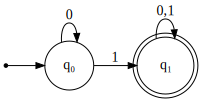

In [ ]:
DFA(
    allow_partial = False,
    states={'q₀', 'q₁'},
    input_symbols={'0', '1'},
    transitions={
        'q₀': { '0': 'q₀', '1' : 'q₁' },
        'q₁': { '0': 'q₁', '1' : 'q₁' } },
    initial_state='q₀',
    final_states={'q₁'} ).show_diagram(path=None)

- ✅ `1`, `01`, `010`, ...
- ❌ ɛ, `0`, `00`, `000`, ...
- Bitstrings with at least one `1`, or `0*1(0|1)*`.

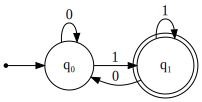

In [ ]:
DFA(
    allow_partial = False,
    states={'q₀', 'q₁'},
    input_symbols={'0', '1'},
    transitions={
        'q₀': { '0': 'q₀', '1' : 'q₁' },
        'q₁': { '0': 'q₀', '1' : 'q₁' } },
    initial_state='q₀',
    final_states={'q₁'} ).show_diagram(path=None)

- ✅ `1`, `01`, `0101`, ...
- ❌ ɛ, `0`, `10`, `1110`, ...
- Bitstrings that end in a `1`, or `(0|1)*1`.

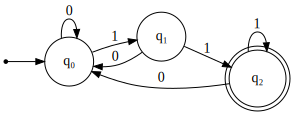

In [ ]:
DFA(
    allow_partial = False,
    states={'q₀', 'q₁', 'q₂'},
    input_symbols={'0', '1'},
    transitions={
        'q₀': { '0': 'q₀', '1' : 'q₁' },
        'q₁': { '0': 'q₀', '1' : 'q₂' },
        'q₂': { '0': 'q₀', '1' : 'q₂' } },
    initial_state='q₀',
    final_states={'q₂'} ).show_diagram(path=None)

- ✅ `11`, `011`, `01011`, ...
- ❌ ɛ, `0`, `1`, `01`, `110`, ...
- Bitstrings that end in two `1`s, or `(0|1)*11`.

### DFA formal definition

- A deterministic finite automaton (DFA) is a tuple $(Q,\Sigma,\delta,q_i,F)$
   * $Q$ is a finite set of states
   * $\Sigma$ is the input alphabet
   * $\delta : Q \times \Sigma → Q$ is a transition function
   * $q_i \in Q$ is the initial state
   * $F \subseteq Q$ is a set of final (or accepting) states

- A word $w \in \Sigma^*$ is processed by a DFA by successively applying $\delta$ to the current state and symbols of $w$, starting in state $q_i$
   - We call this the extended transition function $\hat{\delta} : Q \times \Sigma^* → Q$
   - $\hat{\delta}(q,\varepsilon) = q$
   - $\hat{\delta}(q,xa) = \delta(\hat{\delta}(q,x),a)$

- If the state reached after processing all symbols of $w$ is final, $w$ belongs to the language; otherwise, it does not
   - A word $w$ is accepted iff $\hat{\delta}(q_i,w) \in F$

### Finite automata representations

- FAs have two typical, human-friendly representations

- As a *graph*, states are nodes, transitions are edges, initial state with incoming arrow, accepting states with double border (alphabet is implicit)

- As a *table*, states are rows, alphabet symbols are columns, transitions are table entries, initial state with →, accepting states with *

### Example: Bitstrings with at least one $1$ revisited

`0*1(0|1)*`

- Formally
  - $Q = \{q_0, q_1\}$
  - $\Sigma = \{ 0, 1 \}$
  - $q_i = q_0$
  - $F = \{q_1\}$
  - $\delta(q_0,0) = q_0$, $\delta(q_0,1) = q_1$, $\delta(q_1,0) = q_1$, $\delta(q_1,1) = q_1$

- Table representation

  | state | 0  | 1   |
  |-------|----|-----|
  | → q₀  | q₀ | q₁  |
  | * q₁  | q₁ | q₁  |

- Is `010` accepted?

- Following the table or diagram:
  - start at $q_0$
  - consume $0$, stay in $q_0$
  - consume $1$, transition to $q_1$
  - consume $0$, stay in $q_1$
  - no more symbols to consume, $q_1$ is accepting state, word is accepted

  `q₀ ──0──▶ q₀ ──1──▶ q₁ ──0──▶ q₁` ✅
  
- Or formally:
  - $\hat{\delta}(q_0,010) = \hat{\delta}(\delta(q_0,0),10) = \hat{\delta}(q_0,10)$
  - $\hat{\delta}(q_0,10) = \hat{\delta}(\delta(q_0,1),0) = \hat{\delta}(q_1,0)$
  - $\hat{\delta}(q_1,0) = \hat{\delta}(\delta(q_1,0),\varepsilon) = \hat{\delta}(q_1,\varepsilon)$
  - ${\delta}(q_1,\varepsilon) = q_1$
  - $q_1 ∈ F$ ✅


### Interpretation of FAs

- Finite automata do not have any memory beyond the (finite) states

- In a sense, each state "memorizes" the paths that have led to it

- Since the number of states is finite by definition, there is a limit to what an FA can remember
  - This limits the languages that FAs can recognize

### Exercise

- What is the language recognized by the following DFA?

- What do the states represent?

- You can assign any labels to states to make them more inteligible

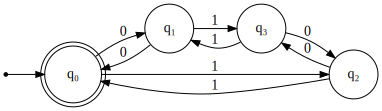

In [ ]:
DFA(
    allow_partial = False,
    states={'q₀', 'q₁', 'q₂', 'q₃'},
    input_symbols={'0', '1'},
    transitions={
        'q₀': { '0': 'q₁', '1' : 'q₂' },
        'q₁': { '0': 'q₀', '1' : 'q₃' },
        'q₂': { '0': 'q₃', '1' : 'q₀' },
        'q₃': { '0': 'q₂', '1' : 'q₁' } },
    initial_state='q₀',
    final_states={'q₀'} ).show_diagram(path=None)

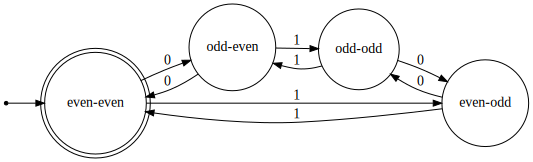

In [ ]:
DFA(
    allow_partial = False,
    states={'even-even', 'odd-even', 'even-odd', 'odd-odd'},
    input_symbols={'0', '1'},
    transitions={
        'even-even': { '0': 'odd-even', '1' : 'even-odd' },
        'odd-even':  { '0': 'even-even', '1' : 'odd-odd' },
        'even-odd':  { '0': 'odd-odd', '1' : 'even-even' },
        'odd-odd':   { '0': 'even-odd', '1' : 'odd-even' } },
    initial_state='even-even',
    final_states={'even-even'} ).show_diagram(path=None)

### Complete vs. incomplete DFAs

- The DFAs we have seen so far are said to be *complete*, because $\delta$ is defined for all pairs of states/symbols

- A DFA is said to be *incomplete* if $\delta$ is not defined for some pair of states/symbols

- When a non-existing transition is triggered, a word is immediately rejected

- Any incomplete DFA can be made complete trivially by adding a "dead state" that leads nowhere
  - By convention, the "dead state" is denoted ∅

### Example: Complete vs. complete DFA

- All bitstrings that do not have two consecutive $1$ symbols

- (What would be the regular expression?)

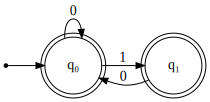

In [ ]:
dfa = DFA(
    allow_partial = True,
    states={'q₀', 'q₁'},
    input_symbols={'0', '1'},
    transitions={
        'q₀': { '0': 'q₀', '1' : 'q₁' },
        'q₁': { '0': 'q₀' } },
    initial_state='q₀',
    final_states={'q₀', 'q₁'} )
dfa.show_diagram(path=None)

  `q₀ ──0──▶ q₀ ──1──▶ q₁ ──1──▶ ⛔️`

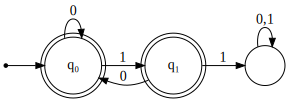

In [ ]:
dfa.to_complete("∅").show_diagram(path=None)

  `q₀ ──0──▶ q₀ ──1──▶ q₁ ──1──▶ ∅` ❌

### Example: A Language of Valid Identifiers (FA)

- Simplified version for a reduced alphabet $\Sigma$

  | state | a  | b  |  c | A  | B  | C  | 0  | 1  | 2  | _  | +  | -  |
  |-------|----|----|----|----|----|----|----|----|----|----|----|----|
  | → q₀  | q₁ | q₁ | q₁ | q₂ | q₂ | q₂ | q₁ | q₂ | q₂ | q₂ | q₂ | q₂ |
  | *q₁   | q₁ | q₁ | q₁ | q₁ | q₁ | q₁ | q₁ | q₂ | q₂ | q₂ | q₂ | q₂ |
  | q₂    | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ | q₂ |

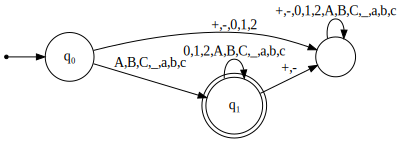

In [ ]:
DFA(
    allow_partial = False,
    states={'q₀', 'q₁', '∅'},
    input_symbols={'a','b','c','A','B','C','0','1','2','_','-','+'},
    transitions={
        'q₀': { c: 'q₁' for c in {'a','b','c','A','B','C','_'}} | { c: '∅' for c in {'0','1','2','-','+'}},
        'q₁': { c: 'q₁' for c in {'a','b','c','A','B','C','0','1','2','_'} } | { c: '∅' for c in {'-','+'} },
        '∅' : { c: '∅'  for c in {'a','b','c','A','B','C','0','1','2','_','-','+'}} },
    initial_state='q₀',
    final_states={'q₁'} ).show_diagram(path=None)

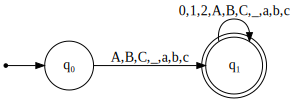

In [ ]:
DFA(
    allow_partial = True,
    states={'q₀', 'q₁'},
    input_symbols={'a','b','c','A','B','C','0','1','2','_','-','+'},
    transitions={
        'q₀': { c: 'q₁' for c in {'a','b','c','A','B','C','_'}},
        'q₁': { c: 'q₁' for c in {'a','b','c','A','B','C','0','1','2','_'} } },
    initial_state='q₀',
    final_states={'q₁'} ).show_diagram(path=None)

## Non-deterministic finite automata

- Non-deterministic finite automata allow multiple outgoing transitions for each pair state/symbol

- A non-deterministic finite automaton (NFA) is a tuple $(Q,\Sigma,\delta,q_i,F)$
   * $Q$ is a finite set of states
   * $\Sigma$ is the input alphabet
   * $\delta : Q \times \Sigma → \color{red}{\mathcal{P}(Q)}$ is a transition function
   * $q_i \in Q$ is the initial state
   * $F \subseteq Q$ is a set of final (or accepting) states

- When executing an NFA, we can be in multiple states simultaneously, rather than in a single one as in a DFA

- A word $w \in \Sigma^*$ is processed by an NFA by successively applying $\delta$ to all the current states and symbols of $w$, starting in states $\{q_i\}$
   - We call this the extended transition function $\hat{\delta} : Q \times \Sigma^* → \mathcal{P}(Q)$
   - $\hat{\delta}(q,\varepsilon) = \{q\}$
   - $\hat{\delta}(q,xa) = \bigcup_{p \in \hat{\delta}(q,x)} \delta(p,a)$

- If one of the states reached after processing all symbols of $w$ is final, $w$ belongs to the language; otherwise, it does not
   - A word $w$ is accepted iff $\color{red}{\hat{\delta}(q_i,w) \cap F} \neq \emptyset$

### Executing NFAs

- Since we now may be in multiple states of the NFA simultaneously, an execution is a *tree* of states

- This is called a *computation tree*

- A word is accepted if **any** branch of a tree finishes in an accepting state

### Example: Bitstrings whose 2nd to last symbol is 1

- `(0|1)*1(0|1)`

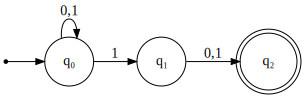

In [ ]:
nfa = NFA(
    states={'q₀', 'q₁', 'q₂'},
    input_symbols={'0', '1'},
    transitions={
        'q₀': { '0' : {'q₀'}, '1' : {'q₀', 'q₁'} },
        'q₁': { '0' : {'q₂'}, '1' : {'q₂'} },
        'q₂': { '0' : {}, '1' : {} } },
    initial_state='q₀',
    final_states={'q₂'} )
nfa.show_diagram(path=None)

- Is `0110` accepted by this NFA?

- With a computation tree

```
   0       1       1       0
───────────────────────────────────
q₀
│
└──0──▶ q₀
        │
        ├──1──▶ q₀
        │       │
        │       ├──1──▶ q₀
        │       │       │
        │       │       └──0──▶ q₀   ❌
        │       │
        │       └──1──▶ q₁
        │               │
        │               └──0──▶ q₂   ✅
        │
        └──1──▶ q₁
                │
                └──1──▶ q₂
                        │
                        └──0──▶ ⛔️
```

- Or formally:

  - $\hat{\delta}(q_0,0110) = \bigcup_{p \in \delta(q_0,0)} \hat{\delta}(p,110) = \hat{\delta}(q_0,110)$
  - $\hat{\delta}(q_0,110) = \bigcup_{p \in \delta(q_0,)} \hat{\delta}(p,110) = \hat{\delta}(q_0,10) \cup \hat{\delta}(q_1,10)$
  - $\hat{\delta}(q_0,10) \cup \hat{\delta}(q_1,10) = (\hat{\delta}(q_0,0) \cup \hat{\delta}(q_1,0)) \cup \hat{\delta}(q_2,0) = (\hat{\delta}(q_0,\varepsilon) \cup \hat{\delta}(q_2,\varepsilon)) \cup \emptyset $
  - $\hat{\delta}(q_0,\varepsilon) \cup \hat{\delta}(q_2,\varepsilon) = \{ q_0, q_2\}$
  - $F \cap \{ q_0, q_2\} = \{ q_2 \} \neq \emptyset$ ✅

### NFAs vs. DFAs

- NFAs and DFAs are **equivalent** formalisms
  - They can recognize exactly the same languages, and can be converted between one another automatically

- Some languages are easier to represent in NFAs

- But DFA recognition is more efficient

- Usually, we manipulate NFAs, but then translate into DFAs for efficent implementation

- However, the resulting DFA can be considerably bigger, with up to $2^{|Q|}$ states for an NFA with states $Q$


### NFA → DFA: subset construction

- The core idea behind this construction is to create a state in the DFA for each possible subset of states in the NFA

- We will use these subsets as labels of the DFA to make the transformation clear
  - For instance, a DFA state $\{q_0, q_2\}$ will represent being simultaneously in $q_0$ and $q_2$ in the NFA

- To translate an NFA $(Q_N,\Sigma,\delta_N,q_N,F_N)$ into a DFA $(Q_D,\Sigma,\delta_D,q_D,F_D)$, the algorithm is the following:

  - Create all $Q_D = \mathcal{P}(Q_N)$

  - For each subset state $p \in Q_D$ and for each symbol $a \in \Sigma$:
    - $\delta_D(p,a) = \bigcup_{q \in p} \delta_N(q,a)$

  - The initial state $q_D$ is $\{ q_N \}$ (it starts in exactly one state, the initial state of the NFA)

  - The final states $F_D$ are all subset states $p \in Q_D$ such that $p \cap F_N \neq \emptyset$ (any state that is in some accepting state of the NFA)

- In practice, it's not worth it to create all states, just create them as needed starting from the initial state $\{q_N\}$


### Example: Bitstrings whose 2nd to last symbol is 1 (revisited)

- Let us convert the given NFA into a DFA

- The initial state is $\{ q_0 \}$

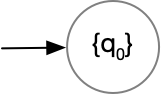

- State $\{ q_0 \}$ represents a single NFA state, so it is easy:
  - $\delta_N(q_0,0) = \{q_0\}$ and $\delta_N(q_0,1) = \{q_0, q_1\}$, so $\delta_D(\{ q_0 \},0) = \{q_0\}$ and $\delta_D(\{ q_0 \},1) = \{q_0, q_1\}$

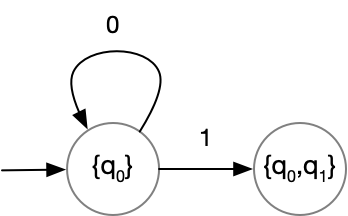

- This introduced a new state $\{q_0, q_1\}$, which represents two simultaneous states of the NFA; we must apply the transitions to all states
  - $\delta_N(q_0,0) = \{q_0\}$ and $\delta_N(q_1,0) = \{q_2\}$, so $\delta_D(\{q_0,q_1\},0) = \{q_0,q_2\}$
  - $\delta_N(q_0,1) = \{q_0,q_1\}$ and $\delta_N(q_1,1) = \{q_2\}$, so $\delta_D(\{q_0,q_1\},1) = \{q_0,q_1,q_2\}$

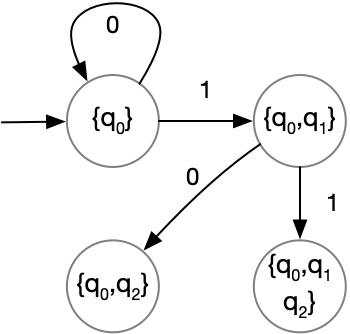

- This introduced two new states, $\{q_0, q_2\}$ and $\{q_0, q_1, q_2\}$
  - $\delta_N(q_0,0) = \{q_0\}$ and $\delta_N(q_2,0) = \emptyset$, so $\delta_D(\{q_0,q_2\},0) = \{q_0\}$
  - $\delta_N(q_0,1) = \{q_0,q_1\}$ and $\delta_N(q_2,1) = \emptyset$, so $\delta_D(\{q_0,q_2\},1) = \{q_0, q_1\}$
  - $\delta_N(q_0,0) = \{q_0\}$, $\delta_N(q_1,0) = \{q_2\}$ and $\delta_N(q_2,0) = \emptyset$, so $\delta_D(\{q_0,q_1,q_2\},0) = \{q_0, q_2\}$
  - $\delta_N(q_0,1) = \{q_0, q_1\}$, $\delta_N(q_1,1) = \{q_2\}$ and $\delta_N(q_2,1) = \emptyset$, so $\delta_D(\{q_0,q_1,q_2\},0) = \{q_0,q_1, q_2\}$

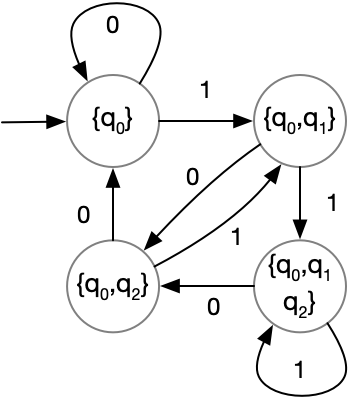

- No new states introduced, the DFA is complete (only needed $4$ states instead of the potential $2^3$)
  


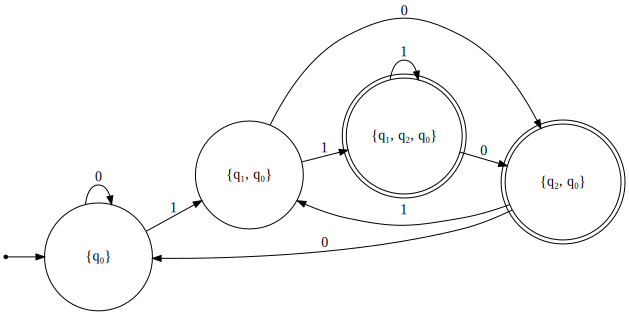

In [ ]:
G = DFA.from_nfa(nfa, retain_names=True, minify=False).diagram
for n in G.nodes():
  if 'circle' in n.attr['shape']:
    n.attr['width'] = 1.5
    n.attr['height'] = 1.5
    n.attr['fixedsize'] = True
    n.attr['label'] = str(n).replace("}, {","},\n{")
G.layout(prog='dot')
G

```
      0         1            1               0
────────────────────────────────────────────────────────
{q₀}──0──▶{q₀}──1──▶{q₁,q₀}──1──▶{q₁,q₂,q₀}──0──▶{q₂,q₀} ✅
```

### DFA → NFA: by definition

- An NFA is an automaton where, for each state/symbol pair, there are *arbitrary* transitions

- A DFA is an automaton where, for each state/symbol pair, there is *exactly one* transition

- So DFA are particular cases of NFAs by definition

### Exercise: (Some) Python keywords

- Convert the following NFA into an equivalent DFA

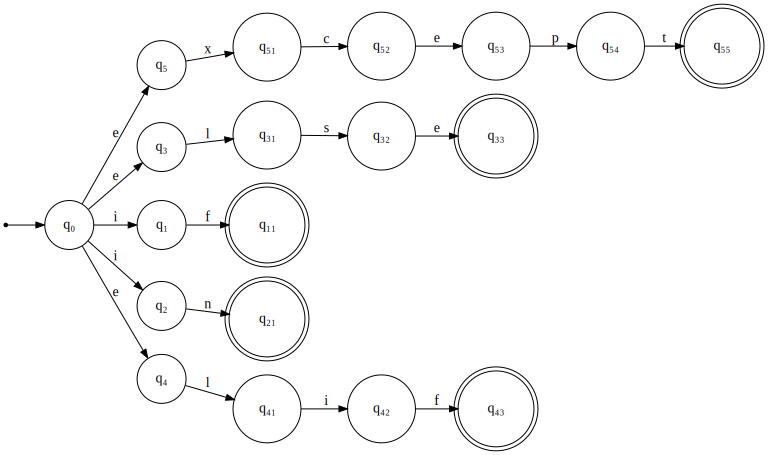

In [ ]:
import string
nfa = NFA(
    states={'q₀', 'q₁', 'q₂', 'q₃', 'q₄', 'q₅', 'q₁₁', 'q₂₁', 'q₃₁', 'q₃₂', 'q₃₃', 'q₄₁', 'q₄₂', 'q₄₃', 'q₅₁', 'q₅₂', 'q₅₃', 'q₅₄', 'q₅₅'},
    input_symbols=string.ascii_lowercase,
    transitions={
        'q₀':  { 'i' : {'q₁','q₂'}, 'e' : {'q₃','q₄','q₅'} },
        'q₁':  { 'f' : {'q₁₁'}},
        'q₂':  { 'n' : {'q₂₁'}},
        'q₃':  { 'l' : {'q₃₁'}},
        'q₃₁': { 's' : {'q₃₂'}},
        'q₃₂': { 'e' : {'q₃₃'}},
        'q₄':  { 'l' : {'q₄₁'}},
        'q₄₁': { 'i' : {'q₄₂'}},
        'q₄₂': { 'f' : {'q₄₃'}},
        'q₅':  { 'x' : {'q₅₁'}},
        'q₅₁': { 'c' : {'q₅₂'}},
        'q₅₂': { 'e' : {'q₅₃'}},
        'q₅₃': { 'p' : {'q₅₄'}},
        'q₅₄': { 't' : {'q₅₅'}},},
    initial_state='q₀',
    final_states={'q₁₁','q₂₁','q₃₃','q₄₃','q₅₅'} )
nfa.show_diagram(path=None)

```
   e       l       i       f
────────────────────────────────────
q₀
│
├──e──▶ q₃
│       │
│       └──l──▶ q₃₁
│               │
│               └──i──▶ ⛔️
├──e──▶ q₄
│       │       
│       └──l──▶ q₄₁       
│               │       
│               └──i──▶ q₄₂
│                       │
│                       └──f──▶ q₄₃   ✅
└──e──▶ q₅       
        └──l──▶ ⛔️
```

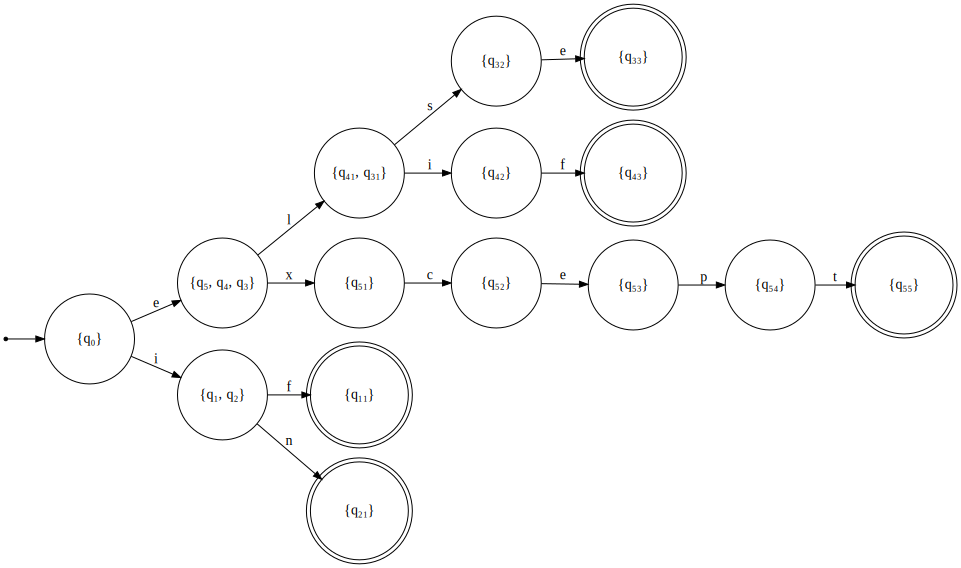

In [ ]:
G = DFA.from_nfa(nfa, retain_names=True, minify=False).diagram
for n in G.nodes():
  if 'circle' in n.attr['shape']:
    n.attr['width'] = 1.25
    n.attr['height'] = 1.25
    n.attr['fixedsize'] = True
    n.attr['label'] = str(n).replace("}, {","},\n{")
G.layout(prog='dot')
G

```
      e               l              i          f
─────────────────────────────────────────────────────────
{q₀}──e──▶{q₃,q₄,q₅}──l──▶{q₃₁,q₄₁}──i──▶{q₄₂}──f──▶{q₄₃} ✅
```

## Non-deterministic finite automata with $\varepsilon$ transitions

- $\varepsilon$ transitions are spontaneous, they allow the state to change without consuming input symbols

- $\varepsilon$ is not a symbol of the alphabet $\Sigma$, and does not appear in the words, it represents the absence of input

- A non-deterministic finite automaton with $\varepsilon$ transitions (εNFA) is a tuple $(Q,\Sigma,\delta,q_i,F)$
   * $Q$ is a finite set of states
   * $\Sigma$ is the input alphabet
   * $\delta : Q \times \Sigma \cup \color{red}{\{ \varepsilon \}} → \mathcal{P}(Q)$ is a transition function
   * $q_i \in Q$ is the initial state
   * $F \subseteq Q$ is a set of final (or accepting) states

- To reason about εNFAs, we need the $\varepsilon$-closure of a state, every state reachable through spontaneous transitions
  - base case: $q \in ɛ\text{-closure}(q)$
  - inductive case: if $p$ is in $ɛ\text{-closure}(q)$, $\delta(p,ɛ) \subseteq ɛ\text{-closure}(q)$
  - we generalize this to apply to a set of states $S$ as $ɛ\text{-closure}(S) = \bigcup_{q \in S} ɛ\text{-closure}(q)$

- The extended transition function $\hat{\delta} : Q \times \Sigma^* → \mathcal{P}(Q)$ is then defined as
   - $\hat{\delta}(q,\varepsilon) = ɛ\text{-closure}(q)$
   - $\hat{\delta}(q,xa) = ɛ\text{-closure}\left(\bigcup_{p \in \hat{\delta}(q,x)} \delta(p,a)\right)$

- The accepting condition is the same as NFAs without ɛ transitions, since $\hat{\delta}$ applies the ɛ-clousure
   - A word $w$ is accepted iff $\hat{\delta}(q_i,w) \cap F \neq \emptyset$


### Example: Floating point numbers

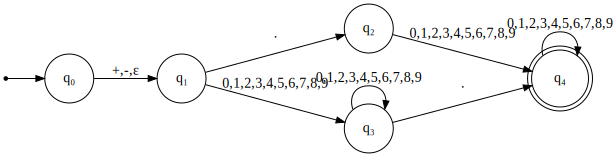

In [ ]:
nfa = NFA(
    states={'q₀', 'q₁', 'q₂', 'q₃', 'q₄'},
    input_symbols={'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '.'},
    transitions={
        'q₀': { c : {'q₁'} for c in { '', '+', '-'}},
        'q₁': { '.' : {'q₂'}} | { c : {'q₃'} for c in {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}},
        'q₂': { c : {'q₄'} for c in {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}},
        'q₃': { '.' : {'q₄'}} | { c : {'q₃'} for c in {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}},
        'q₄': { c : {'q₄'} for c in {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}} },
    initial_state='q₀',
    final_states={'q₄'} )
nfa.show_diagram(path=None)

- $\varepsilon\text{-closure}(q_0) = \{q_0, q_1\}$
- $\varepsilon\text{-closure}(q_1) = \{q_1\}$
- $\varepsilon\text{-closure}(q_2) = \{q_2\}$
- $\varepsilon\text{-closure}(q_3) = \{q_3\}$
- $\varepsilon\text{-closure}(q_4) = \{q_4\}$

```
   -       .       4       5
────────────────────────────────────
q₀
│
└──-──▶ q₁
        │
        └──.──▶ q₂
                │
                └──4──▶ q₄
                        │       
                        └──5──▶ q₄ ✅
q₁
│
└──-──▶ ⛔️        
```

```
   3       5       .       4
────────────────────────────────────
q₀
│
└──3──▶ ⛔️

q₁
│
└──3──▶ q₃
        │
        └──5──▶ q₃
                │
                └──.──▶ q₄      
                        │       
                        └──4──▶ q₄ ✅                      
```

### εNFAs vs. NFAs vs. DFAs

- εNFAs are equivalent to NFAs and DFAs, they can recognize exactly the same languages

- εNFAs allow us to more easily encode automata, that can be then converted into DFA for execution

- This is still done with the subset construction, but now considering the $\varepsilon$-closure

### Exercise: (Some) Python keywords revisited

- Convert the following εNFA into a DFA

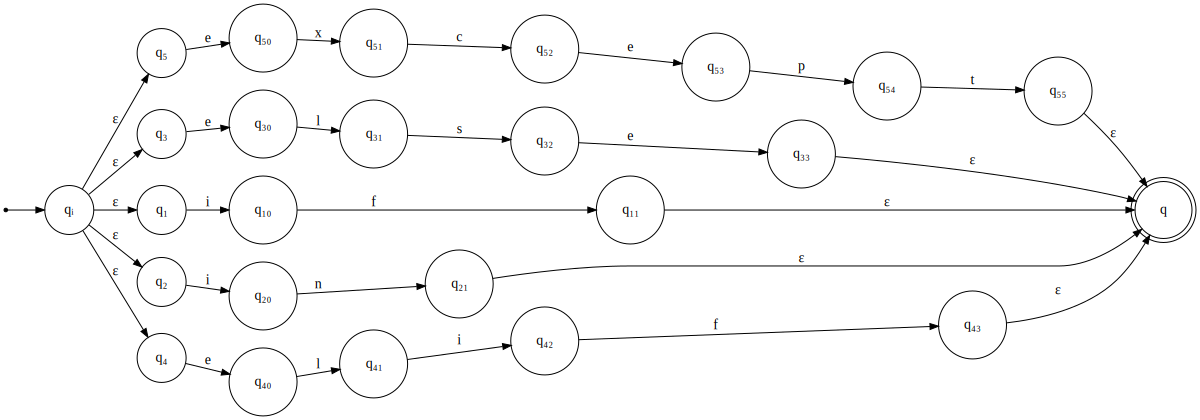

In [ ]:
import string
nfa = NFA(
    states={'qᵢ', 'q₁', 'q₂', 'q₃', 'q₄', 'q₅', 'q₁₀', 'q₂₀', 'q₃₀', 'q₄₀', 'q₅₀', 'q₁₁', 'q₂₁', 'q₃₁', 'q₃₂', 'q₃₃', 'q₄₁', 'q₄₂', 'q₄₃', 'q₅₁', 'q₅₂', 'q₅₃', 'q₅₄', 'q₅₅', 'qⱼ'},
    input_symbols=string.ascii_lowercase,
    transitions={
        'qᵢ':  {'' : {'q₁', 'q₂', 'q₃', 'q₄', 'q₅'}},
        'q₁':  { 'i' : {'q₁₀'}},
        'q₂':  { 'i' : {'q₂₀'}},
        'q₃':  { 'e' : {'q₃₀'}},
        'q₄':  { 'e' : {'q₄₀'}},
        'q₅':  { 'e' : {'q₅₀'}},
        'q₁₀':  { 'f' : {'q₁₁'}},
        'q₂₀':  { 'n' : {'q₂₁'}},
        'q₃₀':  { 'l' : {'q₃₁'}},
        'q₃₁': { 's' : {'q₃₂'}},
        'q₃₂': { 'e' : {'q₃₃'}},
        'q₄₀':  { 'l' : {'q₄₁'}},
        'q₄₁': { 'i' : {'q₄₂'}},
        'q₄₂': { 'f' : {'q₄₃'}},
        'q₅₀':  { 'x' : {'q₅₁'}},
        'q₅₁': { 'c' : {'q₅₂'}},
        'q₅₂': { 'e' : {'q₅₃'}},
        'q₅₃': { 'p' : {'q₅₄'}},
        'q₅₄': { 't' : {'q₅₅'}},
        'q₁₁': { '' : {'qⱼ'}},
        'q₂₁': { '' : {'qⱼ'}},
        'q₃₃': { '' : {'qⱼ'}},
        'q₄₃': { '' : {'qⱼ'}},
        'q₅₅': { '' : {'qⱼ'}},
        },
    initial_state='qᵢ',
    final_states={'qⱼ'} )
nfa.show_diagram(path=None)

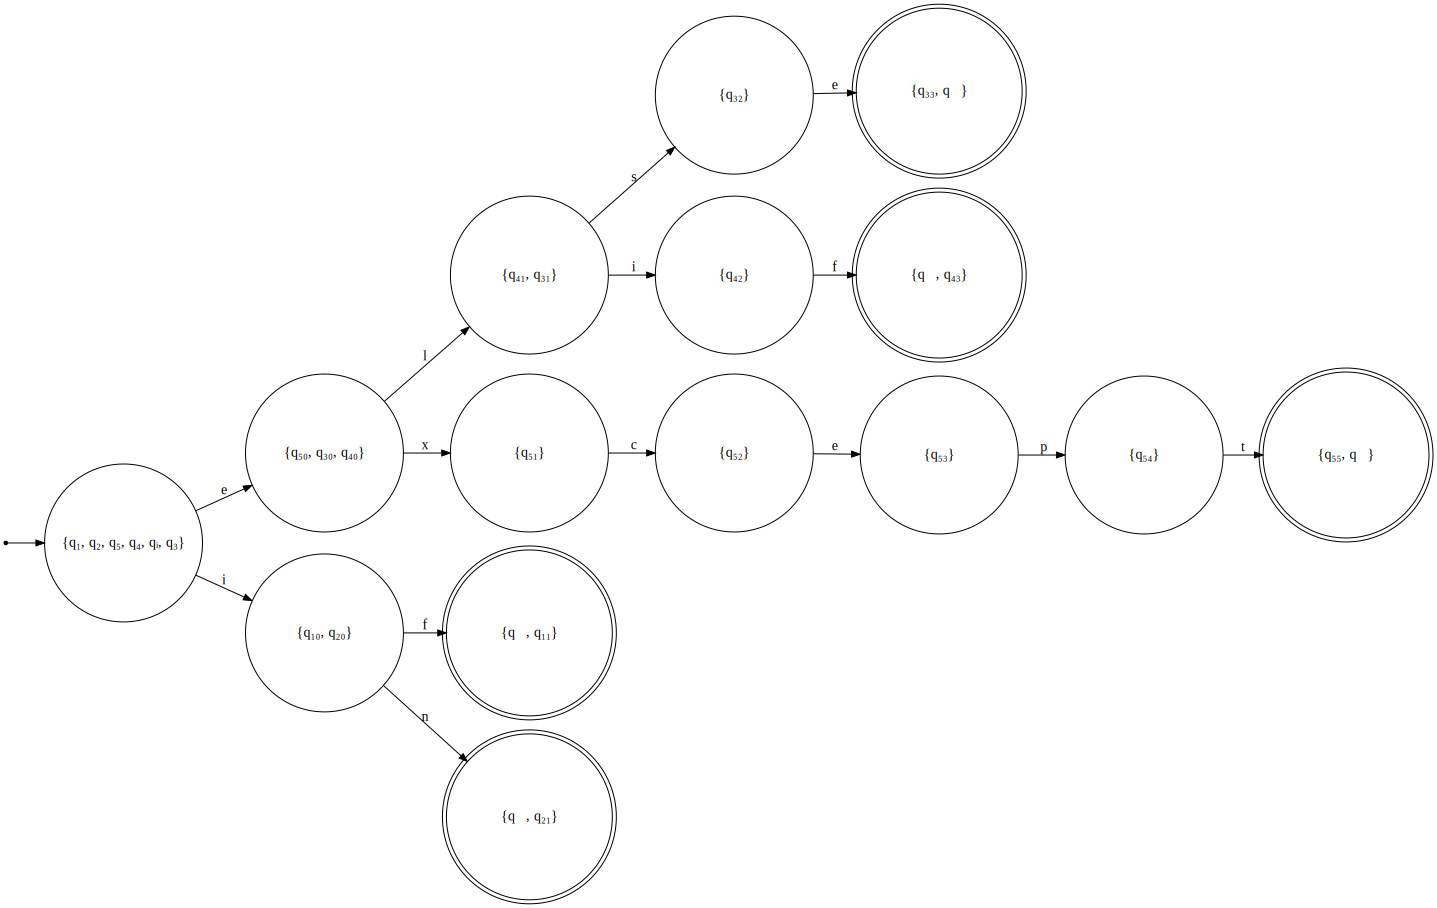

In [ ]:
G = DFA.from_nfa(nfa, retain_names=True, minify=False).diagram
for n in G.nodes():
  if 'circle' in n.attr['shape']:
    n.attr['width'] = 2.2
    n.attr['height'] = 2.2
    n.attr['fixedsize'] = True
    n.attr['label'] = str(n).replace("}, {","},\n{")
G.layout(prog='dot')
G

## FAs vs. REs

- FAs and REs are formalisms with the same expressive power

- Any RE can be (automatically) converted into an FA, and vice-versa

- Since REs are more human-friendly, and DFAs more efficient to execute, the typical pipeline is
  - RE → ɛNFA → DFA

### RE → ɛNFA: Thompson's construction

- Thompson's construction acts inductively on an RE to convert it into an ɛNFA

- Each step produces an ɛNFA with exactly one initial state and one accepting state

- Base cases:
  - ∅
  
  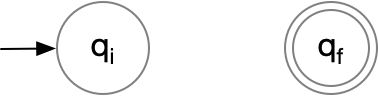

    - ɛ

  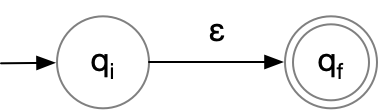

  - $a \in \Sigma$

  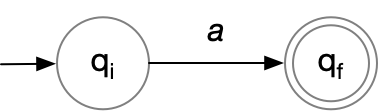

- Inductive steps, for $re_k$ with initial state $k_i$ and $k_f$
  - $re_1 re_2$

  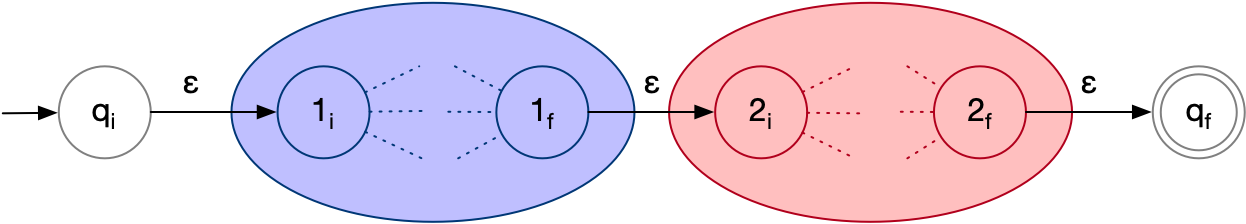

  - $re_1 | re_2$

  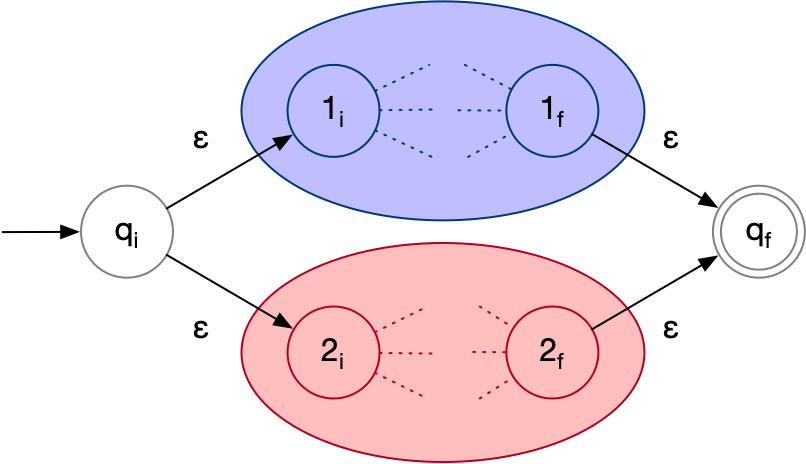


  - ${re_1}^*$


  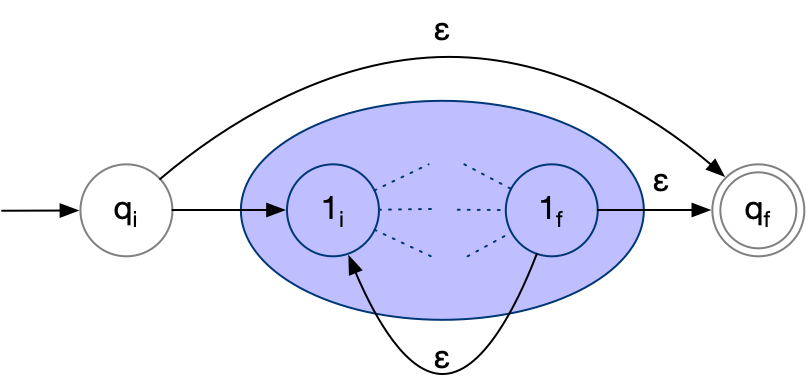


### Example: Bitstrings with at least one $1$ revisited

`0*1(0|1)*`

`0`

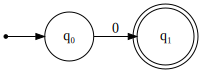

In [ ]:
nfa = NFA(
    states={'q₀', 'q₁'},
    input_symbols={'0', '1'},
    transitions={
        'q₀':  {'0' : {'q₁'}} },
    initial_state='q₀',
    final_states={'q₁'} )
nfa.show_diagram(path=None)

`0*`

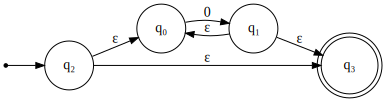

In [ ]:
nfa = NFA(
    states={'q₀', 'q₁', 'q₂', 'q₃'},
    input_symbols={'0', '1'},
    transitions={
        'q₀':  {'0' : {'q₁'}},
        'q₂':  {'' : {'q₀', 'q₃'}},
        'q₁':  {''  : {'q₀', 'q₃'}}},
    initial_state='q₂',
    final_states={'q₃'} )
nfa.show_diagram(path=None)

`0*1`

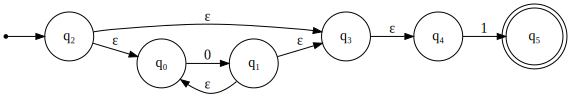

In [ ]:
nfa = NFA(
    states={'q₀', 'q₁', 'q₂', 'q₃', 'q₄', 'q₅'},
    input_symbols={'0', '1'},
    transitions={
        'q₀':  {'0' : {'q₁'}},
        'q₂':  {'' : {'q₀', 'q₃'}},
        'q₁':  {''  : {'q₀', 'q₃'}},
        'q₃':  {'' : {'q₄'}},
        'q₄':  {'1' : {'q₅'}},
    },
    initial_state='q₂',
    final_states={'q₅'} )
nfa.show_diagram(path=None)

`0|1`

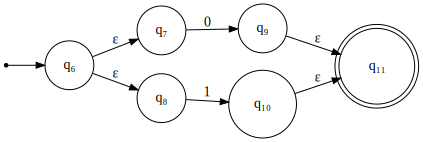

In [ ]:
nfa = NFA(
    states={'q₆', 'q₇', 'q₈', 'q₉', 'q₁₀', 'q₁₁'},
    input_symbols={'0', '1'},
    transitions={
        'q₆':  {'' : {'q₇', 'q₈'}},
        'q₇':  {'0' : {'q₉'}},
        'q₈':  {'1' : {'q₁₀'}},
        'q₉':  {'' : {'q₁₁'}},
        'q₁₀':  {'' : {'q₁₁'}},
    },
    initial_state='q₆',
    final_states={'q₁₁'} )
nfa.show_diagram(path=None)

`(0|1)*`

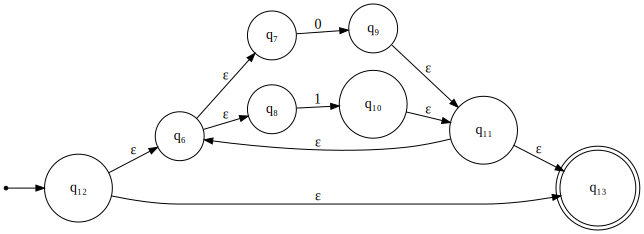

In [ ]:
nfa = NFA(
    states={'q₆', 'q₇', 'q₈', 'q₉', 'q₁₀', 'q₁₁', 'q₁₂', 'q₁₃'},
    input_symbols={'0', '1'},
    transitions={
        'q₆':  {'' : {'q₇', 'q₈'}},
        'q₇':  {'0' : {'q₉'}},
        'q₈':  {'1' : {'q₁₀'}},
        'q₉':  {'' : {'q₁₁'}},
        'q₁₀':  {'' : {'q₁₁'}},
        'q₁₁':  {'' : {'q₁₃', 'q₆'}},
        'q₁₂':  {'' : {'q₆', 'q₁₃'}},
    },
    initial_state='q₁₂',
    final_states={'q₁₃'} )
nfa.show_diagram(path=None)

`0*1(0|1)*`

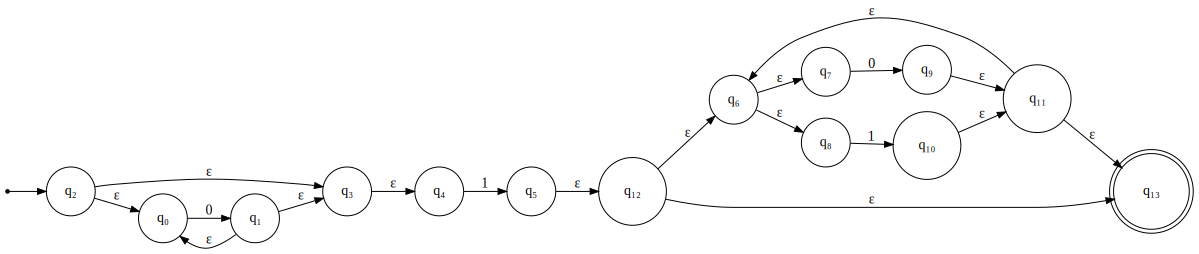

In [ ]:
nfa = NFA(
    states={'q₀', 'q₁', 'q₂', 'q₃', 'q₄', 'q₅', 'q₆', 'q₇', 'q₈', 'q₉', 'q₁₀', 'q₁₁', 'q₁₂', 'q₁₃'},
    input_symbols={'0', '1'},
    transitions={
        'q₀':  {'0' : {'q₁'}},
        'q₂':  {'' : {'q₀', 'q₃'}},
        'q₁':  {''  : {'q₀', 'q₃'}},
        'q₃':  {'' : {'q₄'}},
        'q₄':  {'1' : {'q₅'}},
        'q₆':  {'' : {'q₇', 'q₈'}},
        'q₇':  {'0' : {'q₉'}},
        'q₈':  {'1' : {'q₁₀'}},
        'q₉':  {'' : {'q₁₁'}},
        'q₁₀':  {'' : {'q₁₁'}},
        'q₁₁':  {'' : {'q₁₃', 'q₆'}},
        'q₁₂':  {'' : {'q₆', 'q₁₃'}},
        'q₅':  {'' : {'q₁₂'}}},
    initial_state='q₂',
    final_states={'q₁₃'} )
nfa.show_diagram(path=None)

/usr/local/lib/python3.12/dist-packages/pygraphviz/agraph.py:1403: RuntimeWarning: Warning: node '{q₆, q₇, q₅, q₁₃, q₁₂, q₈}', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


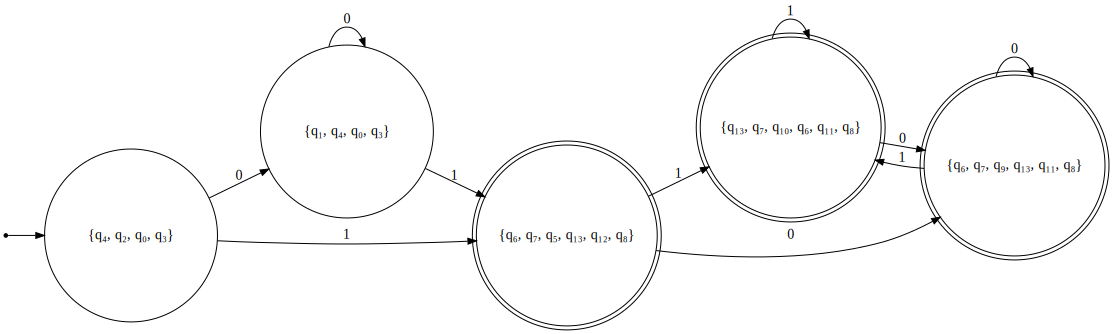

In [ ]:
dfa = DFA.from_nfa(nfa,minify=False,retain_names=True)
G = dfa.diagram
for n in G.nodes():
  if 'circle' in n.attr['shape']:
    n.attr['width'] = 2.4
    n.attr['height'] = 2.4
    n.attr['fixedsize'] = True
    n.attr['label'] = str(n).replace("}, {","},\n{")
G.layout(prog='dot')
G

### Minimal DFAs

- DFAs (but not NFAs!) have a unique, **minimized** version, that can be automatically calculated

- It works by identifying *equivalent* states and merging them

- This allows more efficient implementations

- It also allows to test automata equivalence: two automata are equivalent if their minimized deterministic versions are isomorphic

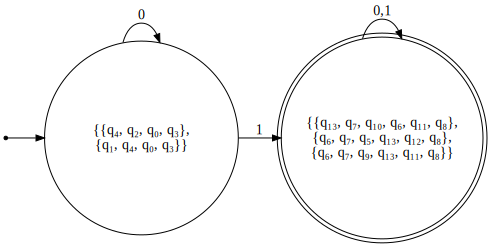

In [ ]:
G = dfa.minify(retain_names=True).diagram
for n in G.nodes():
  if 'circle' in n.attr['shape']:
    n.attr['width'] = 2.7
    n.attr['height'] = 2.7
    n.attr['fixedsize'] = True
    n.attr['label'] = str(n).replace("}, {","},\n{")
G.layout(prog='dot')
G

### ɛNFA -> RE: State elimination

- Main idea: each transition in the FA will represent an RE instead of a single symbol

- Eliminate states from the FA one by one, updating the transitions to a RE that represents traversing the eliminated state

- Essentially, if I'm eliminating $q$, if I there is an incoming edge from $q_0$ through expression $e_0$, and an outgoing edges to $q_1$ with expression $e_1$, there is a new edges between $q_0$ and $q_1$ with expression $e_0e_1$

  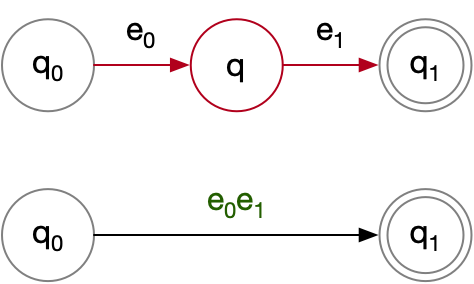

- If the state being eliminated has a self-loop, it results in a Kleene closure inside the new transition

  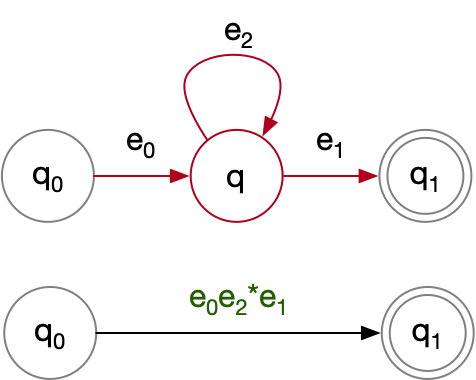

### Example

Let us convert the DFA below into an RE.

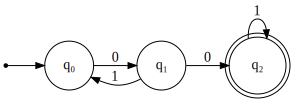

In [ ]:
NFA(
    states={'q₀', 'q₁', 'q₂'},
    input_symbols={'0', '1'},
    transitions={
        'q₀':  {'0' : {'q₁'}},
        'q₁':  {'0' : {'q₂'}, '1' : {'q₀'}},
        'q₂':  {'1' : {'q₂'}}},
    initial_state='q₀',
    final_states={'q₂'} ).show_diagram(path=None)

- Let's start to normalize the DFA (initial state with only outgoing edges, single accepting state with only incoming edges)

- This results in a ɛNFA

  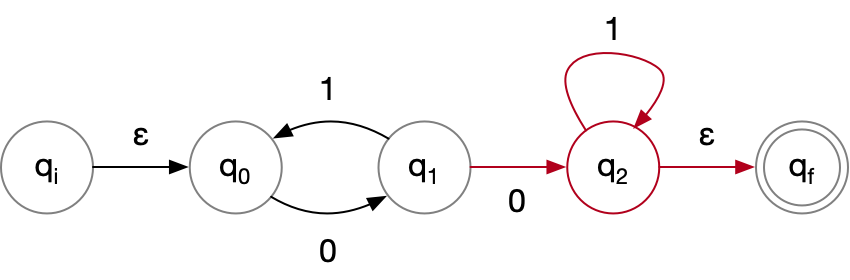

- Let's start by removing, for instance, $q_2$ and its edges (marked red)

- It only has one incoming edge from $q_1$ and an outgoing edge to $q_f$, so a single edge between $q_1$ and $q_f$ is created

- It also has a self loop, which results in a Kleene closure

  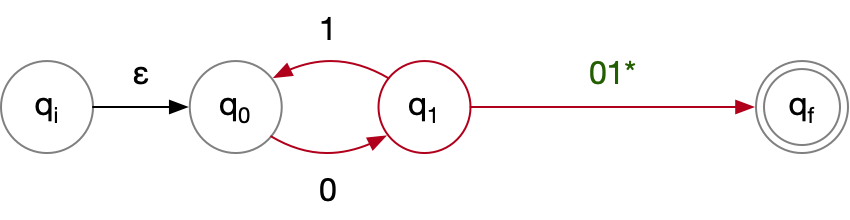

- Next, let's remove, for instance, $q_1$ (marked red)

- Now, there is one incoming edge from $q_0$, and two outgoing edges, to $q_f$ and back to $q_0$: there will be two new edges: from $q_0$ to $q_f$ and from $q_0$ to $q_0$ (a self-loop)

  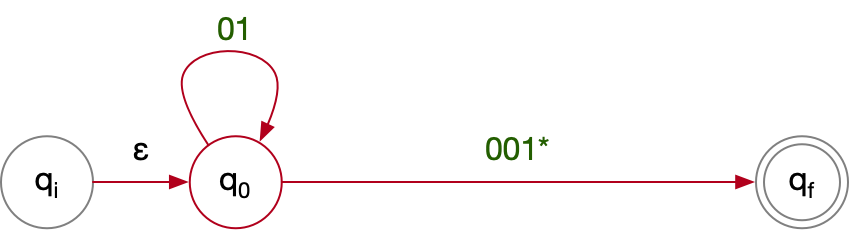

- Finally, let's remove $q_0$, which has in incoming edge from $q_i$ and an outgoing edge to $q_f$: a new edge from $q_i$ to $q_f$ is created

- It also has a self loop, which results in another Kleene closure

  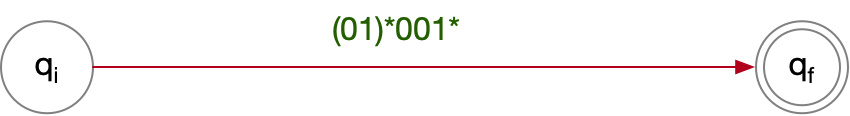

- The state elimination process is concluded: the RE corresponding to the DFA is `(01)*001*`

-- Nuno Macedo